In [3]:
%matplotlib inline

import sys
import pandas as pd
import os
import numpy as np

sys.path.insert(0, '..')
from glmhmm.glm_hmm import *
import matplotlib.pyplot as plt
from glmhmm.fitting import CrossValidation, GridSearch, mostProbSeq, FineTune, ShuffleControl
from preprocessing import utils2 as ut
from glmhmm.utils import find_last_non_nan_elements

#parentdir = '/Users/harshagurnani/Documents/GitHub/behavior-glm-hmm/'

## single session

In [4]:
file = '../example_data/sub_455220/sub-455220_ses-20190729T145044_trial_events.csv'

In [3]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(file, 3, True, 4)

Converged after 81 iterations
Converged after 96 iterations
Converged after 95 iterations
Converged after 95 iterations
Converged after 83 iterations
Converged after 95 iterations
Converged after 102 iterations
Converged after 97 iterations
Converged after 114 iterations
Converged after 95 iterations
Converged after 110 iterations
Converged after 114 iterations
Converged after 87 iterations
Converged after 84 iterations
Converged after 123 iterations
Converged after 143 iterations
Converged after 122 iterations
Converged after 80 iterations
Converged after 75 iterations
Converged after 104 iterations
Converged after 82 iterations
Converged after 64 iterations
Converged after 66 iterations
Converged after 57 iterations
Converged after 67 iterations
Converged after 82 iterations
Converged after 71 iterations
Converged after 52 iterations
Converged after 68 iterations


In [4]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[0.5290031 , 0.29543473, 0.3812712 , 0.50942131, 0.24644817,
        0.4819352 , 0.60296858, 0.32110808, 0.23251658, 0.36627526],
       [0.50639733, 0.31446502, 0.36504138, 0.50390578, 0.27526227,
        0.49442235, 0.61254427, 0.31620305, 0.23032597, 0.3819144 ],
       [0.5241295 , 0.31292753, 0.37040346, 0.50430779, 0.2722162 ,
        0.49169887, 0.61065435, 0.31834705, 0.23170238, 0.37943841]])

In [5]:
max_index = np.unravel_index(np.argmax(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]
pi0 = pi0_all[i,j]

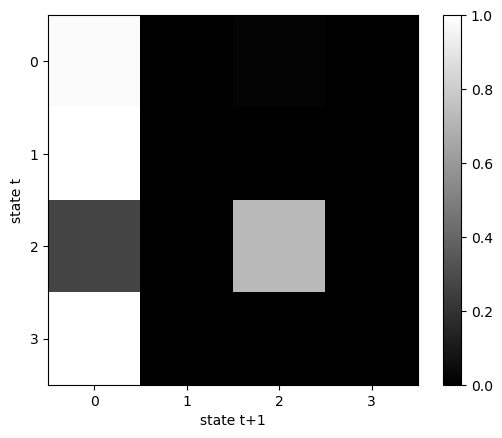

In [6]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

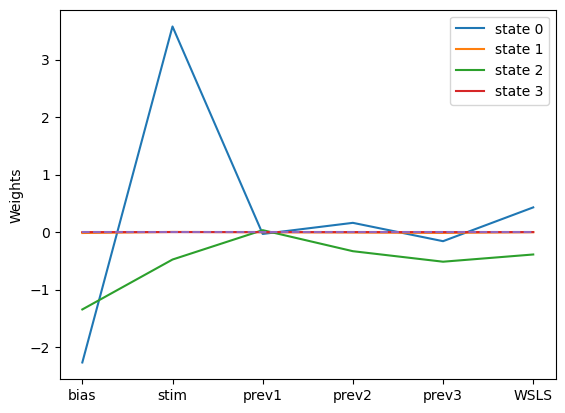

In [7]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
cmap = plt.get_cmap('Blues')
#=for i in range(3):
#    weight = w_all[i,j]
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))#, color=cmap(jj/nstates))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

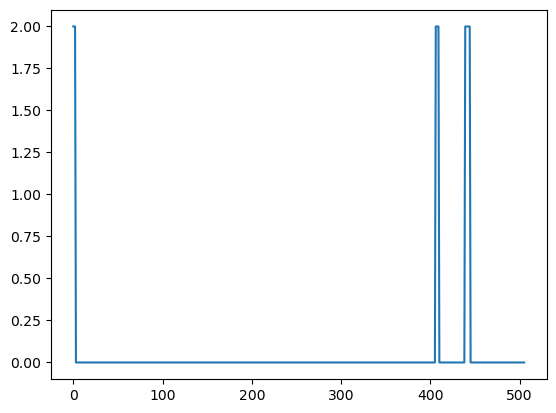

In [8]:
data = ut.Dataloader_sess(file, nprev = 3, exig = True)
X = data[:,1:-1]
y = data[:,-1]
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## single animal

In [9]:
folder = '../example_data/sub_455220/'
nprev=3
nlat=2
exig=True

data = ut.Dataloader_ani(folder, nprev = nprev, exig = exig)
X = data[:,1:-1]
y = data[:,-1]

In [10]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(folder, nprev, exig, nlat)

Converged after 48 iterations
Converged after 31 iterations
Converged after 59 iterations
Converged after 23 iterations
Converged after 20 iterations
Converged after 43 iterations
Converged after 10 iterations
Converged after 33 iterations
Converged after 10 iterations
Converged after 60 iterations
Converged after 95 iterations
Converged after 25 iterations
Converged after 47 iterations
Converged after 16 iterations
Converged after 9 iterations
Converged after 36 iterations
Converged after 7 iterations
Converged after 16 iterations
Converged after 7 iterations
Converged after 53 iterations
Converged after 114 iterations
Converged after 102 iterations
Converged after 52 iterations
Converged after 46 iterations
Converged after 13 iterations
Converged after 37 iterations
Converged after 11 iterations
Converged after 51 iterations
Converged after 9 iterations
Converged after 7 iterations


In [11]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[0.27958408, 0.37067135, 0.36565709, 0.4810587 , 0.3574472 ,
        0.38924846, 0.3750065 , 0.49038107, 0.40552782, 0.44951266],
       [0.28944532, 0.37129209, 0.36547988, 0.48103906, 0.35757013,
        0.38910404, 0.37491904, 0.49028442, 0.40542676, 0.44864224],
       [0.25812873, 0.37609512, 0.3637004 , 0.48068496, 0.3567236 ,
        0.38774267, 0.37264171, 0.48564637, 0.40403357, 0.44888675]])

In [12]:
max_index = np.unravel_index(np.argmax(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]
pi0 = pi0_all[i,j]

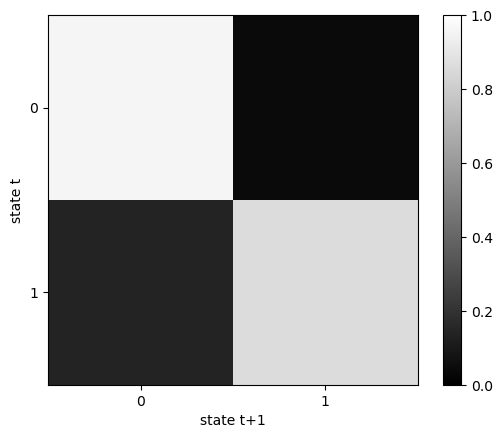

In [13]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

In [14]:
A

array([[0.95929995, 0.04070005],
       [0.13689223, 0.86310777]])

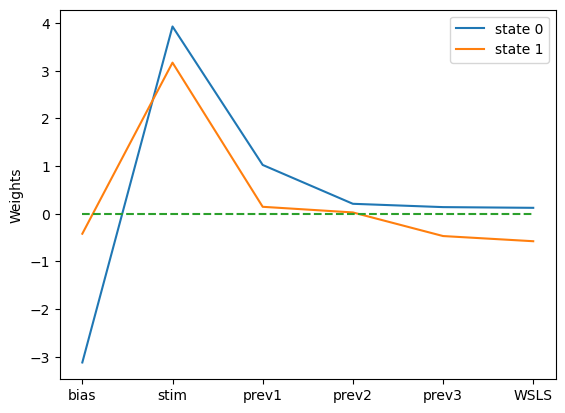

In [15]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

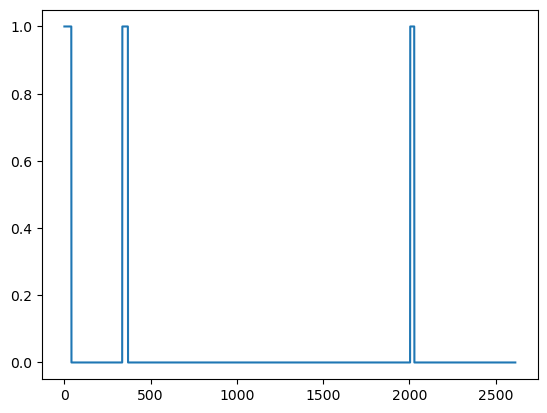

In [16]:
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## multiple animals

In [17]:
folder=None
nprev=3
exig=True
nlat=4
num_folds = 10
num_init = 1

In [18]:
lls_train, lls_test, ll0, A_all, w_all, pi0_all, train_size, test_size = CrossValidation(folder, nprev, exig, nlat, num_folds=num_folds, num_init=num_init)

../example_data/sub_479121
../example_data/sub_455220
../example_data/sub_480928
../example_data/sub_455219
Converged after 84 iterations
Converged after 133 iterations
Converged after 100 iterations
Converged after 104 iterations
Converged after 66 iterations


In [19]:
info = (lls_test - ll0)/(np.log(2)*test_size)
info


array([[0.61298546, 0.42551207, 0.40433392, 0.41369341, 0.36564116,
        0.4222924 , 0.09103343, 0.28406979, 0.30058037, 0.402083  ]])

In [20]:
max_index = np.unravel_index(np.argmin(lls_test), lls_test.shape)
(i,j) = max_index
A = A_all[i,j]
weight = w_all[i,j]

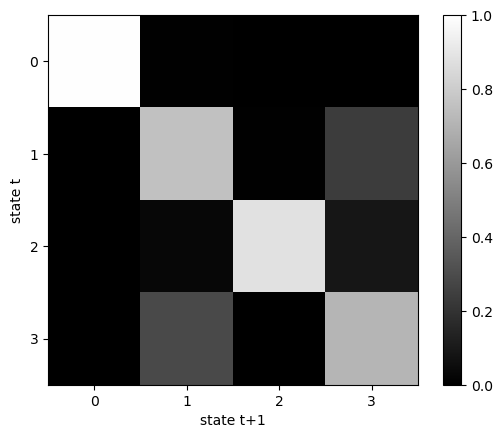

In [21]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

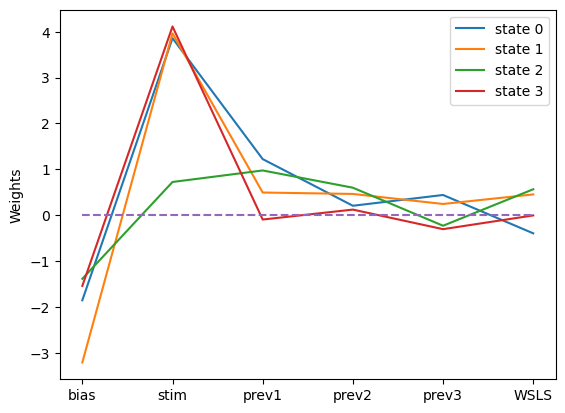

In [22]:
nstates = weight.shape[0]
x = np.arange(1, weight.shape[1] + 1)
for jj in range(nstates):
    plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

### finetune for single animal

In [17]:
folder='../example_data/sub_455220/'

In [42]:
wx = w_all[i,j][np.random.permutation(w_all[i,j].shape[0])]
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
model = GLMHMM(n=data.shape[0],d=data.shape[1]-2,c=2,k=2,observations='bernoulli')

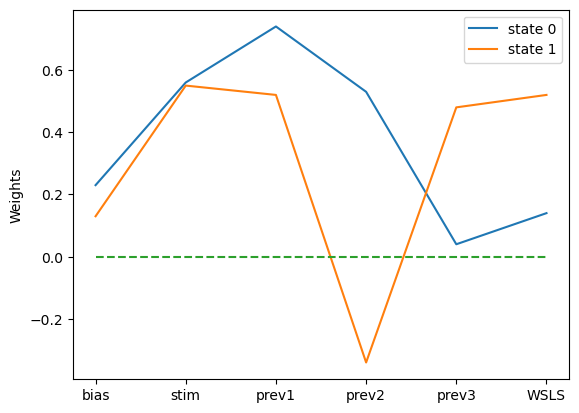

In [59]:
_,wx,_ = model.generate_params()
y = data[:,-1]
X = data[:,1:-1]

nstates = w.shape[0]
x = np.arange(1, w.shape[1] + 1)
for jj in range(nstates):
    #plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
    plt.plot(x, wx[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

ll, A, w, pi0 = model.fit(y,X, A,wx, pi0=pi0, fit_init_states=True)

In [26]:
ll,A,w,pi0, X,y,_,_,_,_ = FineTune(folder, nprev=3, exig=True, num_latent=2,A_init=A,w_init=weight, tol=1e-6)

Converged after 49 iterations


In [27]:
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
y = data[:,-1]
probR = np.sum(y)/len(y)
ll0 = np.log(probR) * np.sum(y) + np.log(1 - probR) * (len(y) - np.sum(y))
info = (ll - ll0)/(np.log(2)*y.shape[0])
info

array([0.40453159])

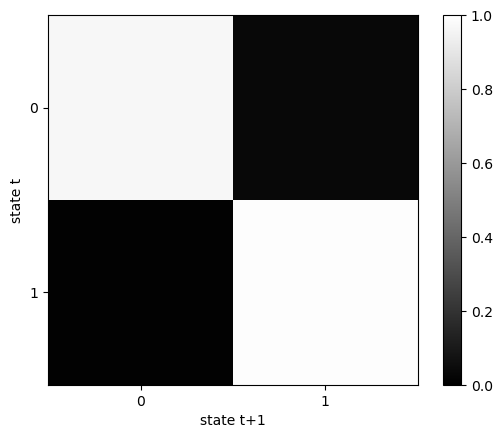

In [55]:
plt.imshow(A, clim=[0,1], cmap = 'gray')
plt.xlabel('state t+1')
plt.ylabel('state t')
plt.xticks(np.arange(A.shape[0]))
plt.yticks(np.arange(A.shape[0]))
plt.colorbar()

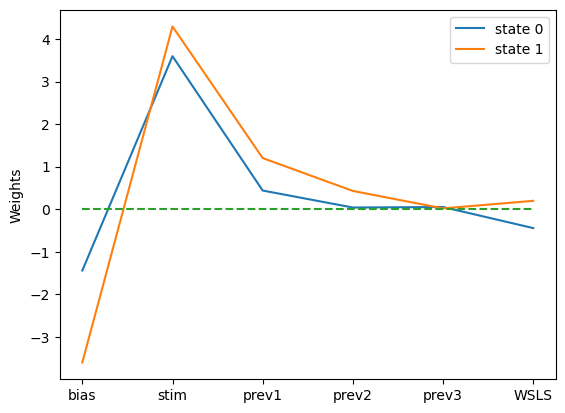

In [61]:
nstates = w.shape[0]
x = np.arange(1, w.shape[1] + 1)
for jj in range(nstates):
    #plt.plot(x, weight[jj,:,1], label = 'state '+np.str_(jj))
    plt.plot(x, w[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(x, [0]*len(x), '--')
plt.xticks(x, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

In [36]:
(w[:,:,1]-wx[:,:,1])

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

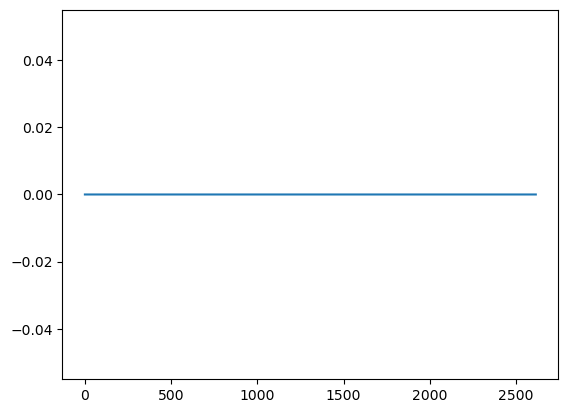

In [37]:
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
X = data[:,1:-1]
y = data[:,-1]
bestpath = mostProbSeq(  y, A, pi0=np.ones(pi0.shape)/pi0.shape, phi=None, X=X, w=weight )
plt.plot(bestpath)

## shuffle control

In [24]:
folder='../example_data/sub_479121/'
nprev=3
exig=True
nlat=4
num_folds = 5
num_init = 3

In [25]:
res_orig, res_shf_t, res_shf_X,train_size, test_size = ShuffleControl(folder, nprev=nprev, exig=exig, num_latent=nlat, num_init = num_init, num_folds=num_folds )

<BarContainer object of 1 artists>

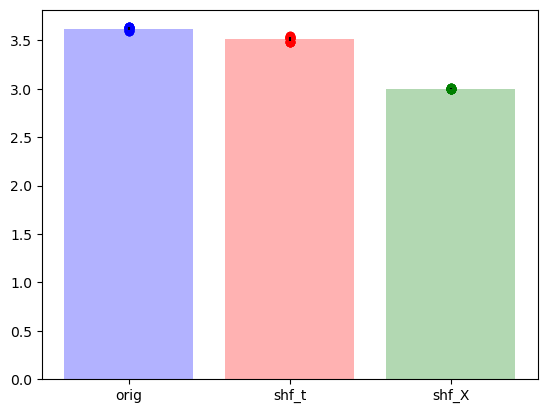

In [26]:
ll_orig = ( (res_orig['lls_test'][:]  - res_orig['ll0'][:] )/(np.log(2)*test_size) ).flatten()
ll_shf_t = ( (res_shf_t['lls_test'][:]  - res_shf_t['ll0'][:] )/(np.log(2)*test_size) ).flatten()
ll_shf_X = ( (res_shf_X['lls_test'][:]  - res_shf_X['ll0'][:] )/(np.log(2)*test_size) ).flatten()

plt.scatter( len(ll_orig)*['orig'], ll_orig, color='b')
plt.scatter( len(ll_shf_t)*['shf_t'], ll_shf_t, color='r')
plt.scatter( len(ll_shf_X)*['shf_X'], ll_shf_X, color='g')
plt.bar('orig', np.mean(ll_orig), yerr=np.std(ll_orig), color='b', alpha=0.3)
plt.bar('shf_t', np.mean(ll_shf_t), yerr=np.std(ll_shf_t), color='r', alpha=0.3)
plt.bar('shf_X', np.mean(ll_shf_X), yerr=np.std(ll_shf_X), color='g', alpha=0.3)

# Direct fitting - weights are being updated

In [5]:
from glmhmm.glm import GLM


In [19]:
folder = '../example_data/sub_455219/'
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
x  = data[:,1:-1]
y = data[:,-1]

In [7]:
model = GLM(n=data.shape[0], d=data.shape[1]-2, c=2 ,observations='bernoulli')
winit = model.init_weights()
w, phi = model.fit(x,winit,y,compHess=True, gaussianPrior=1)

In [8]:
np.linalg.norm(w - winit)

3.8151199074695796

In [54]:
niters = 10
wall = np.zeros((niters, data.shape[1]-2, 2))
for jj in range(niters):   
    winit = model.init_weights()
    w, phi = model.fit(x,winit,y,compHess=True, gaussianPrior=1)
    wall[jj] = w

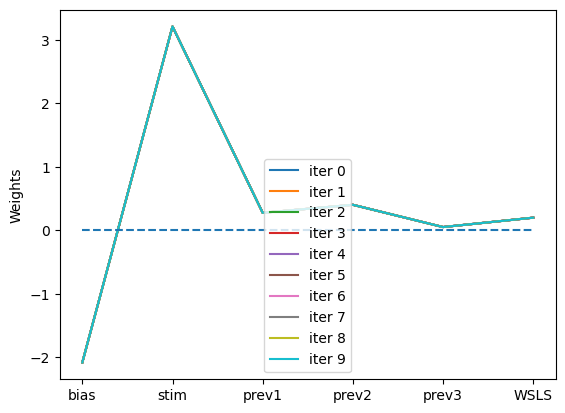

In [55]:

xx = np.arange(1, w.shape[0] + 1)
for jj in range(niters):   
    plt.plot(xx, wall[jj,:,1], label = 'iter '+np.str_(jj))
plt.plot(xx, [0]*len(xx), '--')
plt.xticks(xx, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

In [20]:
model = GLMHMM( n=data.shape[0], d=data.shape[1]-2, c=2, k=2, observations='bernoulli')

In [21]:
A_init,w_init,pi_init = model.generate_params() # initialize the model parameters
ll, A, w, pi0 = model.fit(y,x,A_init,w_init,pi0=pi_init, fit_init_states=True)


Converged after 28 iterations


In [11]:
print(np.linalg.norm(w - w_init))
print(np.linalg.norm(A - A_init))

0.0
0.05251923723811761


In [2]:
bestpath = mostProbSeq(  y, A, pi0=pi0, phi=None, X=x, w=w )
plt.plot(bestpath)

NameError: name 'mostProbSeq' is not defined

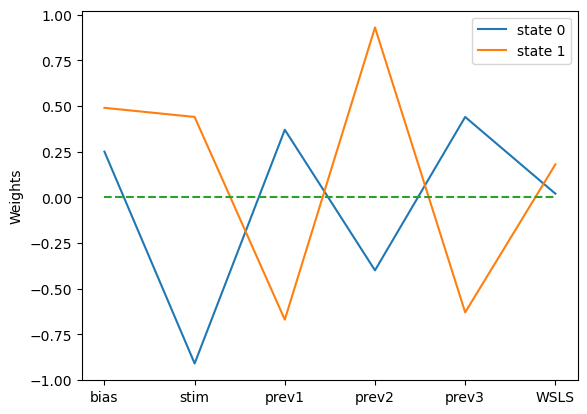

In [22]:
#A_init, w_init, _ = model.generate_params()
xx = np.arange(1, w.shape[1] + 1)
for jj in range(w.shape[0]):
    plt.plot(xx, w[jj,:,1], label = 'state '+np.str_(jj))
plt.plot(xx, [0]*len(xx), '--')
plt.xticks(xx, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

In [ ]:
folder = '../example_data/sub_455220/'
data = ut.Dataloader_ani(folder, nprev = 3, exig = True)
x  = data[:,1:-1]
y = data[:,-1]

In [ ]:
ll2, A2, w2, pi02 = model.fit(y,x,A,w,pi0=pi0, fit_init_states=True)

Converged after 201 iterations


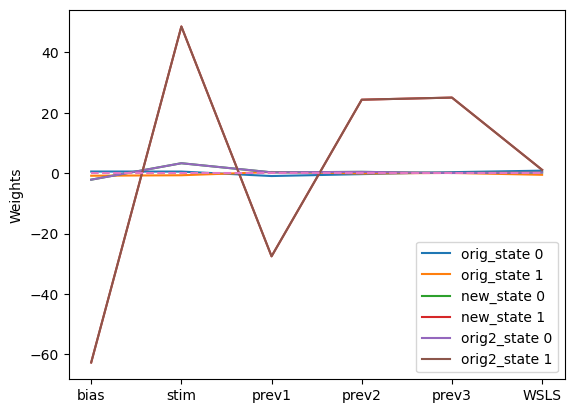

In [17]:
A_init,w_init,pi_init = model.generate_params() # initialize the model parameters
xx = np.arange(1, w_init.shape[1] + 1)
for jj in range(w_init.shape[0]):
    plt.plot(xx, w_init[jj,:,1], label = 'orig_state '+np.str_(jj))

import copy

ll, A, w, pi0 = model.fit(y,x,A_init,copy.deepcopy(w_init),pi0=pi_init, fit_init_states=True)

for jj in range(w.shape[0]):
    plt.plot(xx, w[jj,:,1], label = 'new_state '+np.str_(jj))

for jj in range(w_init.shape[0]):
    plt.plot(xx, w_init[jj,:,1], label = 'orig2_state '+np.str_(jj))

plt.plot(xx, [0]*len(xx), '--')
plt.xticks(xx, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

In [18]:
w-w_init

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [18]:
niters = 3
wall = np.zeros((niters, 4, data.shape[1]-2, 2))
for jj in range(niters):   
    A_init,w_init,pi_init = model.generate_params() # initialize the model parameters
    ll, A, w, phi = model.fit(y,x,A_init,w_init,pi0=pi_init, fit_init_states=True)
    wall[jj] = w

Converged after 192 iterations
Converged after 99 iterations
Converged after 93 iterations


(-10.0, 10.0)

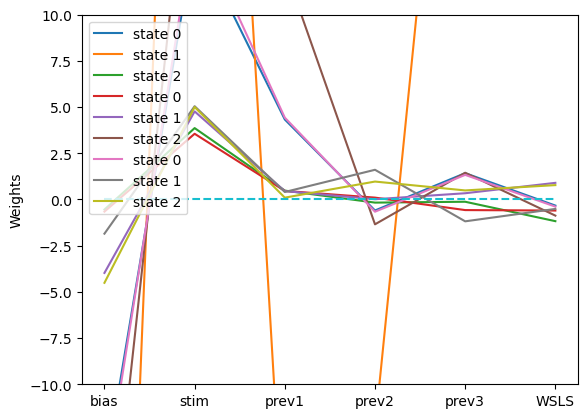

In [21]:
xx = np.arange(1, w.shape[1] + 1)
for jj in range(niters):   
    for kk in range(3):
        plt.plot(xx, wall[jj,kk,:,1], label = 'state '+np.str_(kk))
plt.plot(xx, [0]*len(xx), '--')
plt.xticks(xx, labels = ['bias', 'stim','prev1','prev2', 'prev3', 'WSLS'])
plt.ylabel("Weights")
plt.legend()

In [35]:
lli = np.max(ll[ll>-np.inf])
print(np.exp(lli/data.shape[0]))

probR = np.sum(y)/len(y)
ll0 = np.log(probR) * np.sum(y) + np.log(1 - probR) * (len(y) - np.sum(y))

info = (lli - ll0)/(np.log(2)*data.shape[0])
print(info)


0.6318839513107023
0.3375858608275934
